In [1]:
import numpy
import matplotlib
from scipy.signal import hilbert, chirp 
import scipy.signal as signal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=loadtxt('CAPA_3.txt',skiprows=1)

In [3]:
data2=zeros(256)
data2=data.reshape(256)


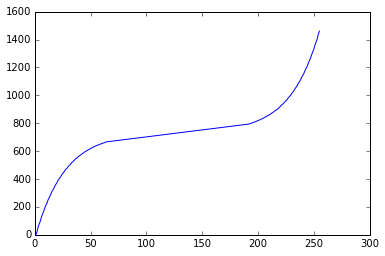

In [4]:
plot(data2)

In [5]:
data3=loadtxt('1605a.txt',skiprows=1)

In [6]:
print max(data3[:,2])

254.0


In [7]:
print min(data3[:,2])

0.0


In [8]:
print max(data3[:,0]),min(data3[:,0]),max(data3[:,1]),min(data3[:,1])

199.0 0.0 255.5 0.0


In [9]:
x=arange(0,200)
y=arange(0,256,0.5)
shape(y)

(512,)

In [10]:
ix=200 
iy=512

In [11]:
z=zeros(ix*iy).reshape(iy,ix)

In [12]:

k=0
for j in range(ix):
    for i in range(iy):
        z[i,j]=float(data3[k,2])
        # G[i,j]=data2[int(z[i,j])]
 
        k=k+1
        
        

In [13]:
G=zeros(ix*iy).reshape(iy,ix)
Gh=zeros(ix*iy).reshape(iy,ix)

In [14]:
# convert logarithm to signal 
k=0
for j in range(ix):
    for i in range(iy):
        #z[i,j]=float(data3[k,2])
        G[i,j]=data2[int(z[i,j])]

        k=k+1
        

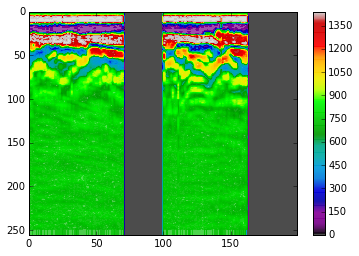

In [15]:
ylim(255.5,0)
contourf(x,y,G,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('z.png')

### Баттерворт фильтр

In [16]:
Gb=zeros(ix*iy).reshape(iy,ix)
N=len(Gb[:,0])
freq=1./float(N)
# First, design the Buterworth filter
N  = 3    # Filter order
#Wn = 0.01 # Cutoff frequency
Wn=50.*freq
for i in range(ix):
    B, A = signal.butter(N, Wn, output='ba')
    # Second, apply the filter
    Gb[:,i] = signal.filtfilt(B,A,G[:,i] )

In [17]:
# Преобразование Гильберта
signal=zeros(iy)
for i in range(ix):
    signal=(Gb[:,i]-mean(Gb[:,i]))
    #signal=(G[:,i]-mean(G[:,i]))
    analytic_signal=hilbert(signal)
    amplitude_envelope = abs(analytic_signal)
    Gh[:,i]=amplitude_envelope
        


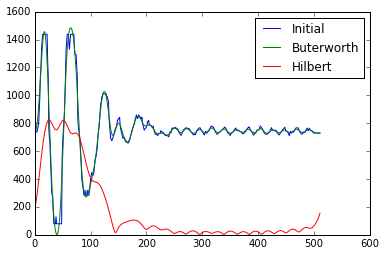

In [18]:
plot(G[:,10],label="Initial")
plot(Gb[:,10],label="Buterworth")

plot (Gh[:,10],label="Hilbert")
legend()

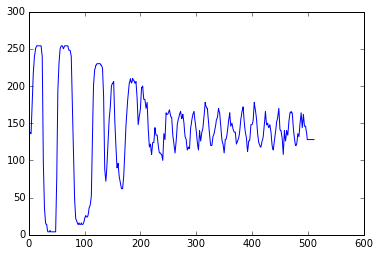

In [19]:
plot(z[:,10])

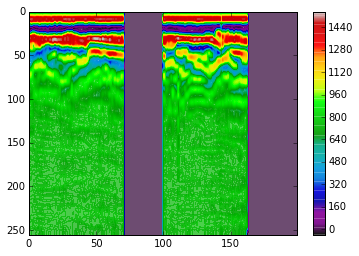

In [20]:
ylim(255.5,0)
contourf(x,y,Gb,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gb.png')

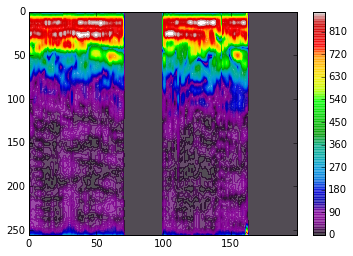

In [21]:
#преобразование Гильберта (для определения среды)
ylim(255.5,0)
lim=arange(0,900,10)
contourf(x,y,Gh,lim,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gh.png')

In [22]:
# Производная
Gp=zeros(ix*iy).reshape(iy,ix)
for j in range(iy-1):
    Gp[j,:]=Gh[j+1,:]-Gh[j,:]


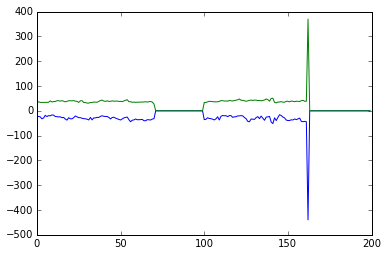

In [23]:
vMin=zeros(ix)
vMax=zeros(ix)
for i in range(ix):
    vMin[i]=min(Gp[:,i])
    vMax[i]=max(Gp[:,i])
plot(vMin)
plot(vMax)

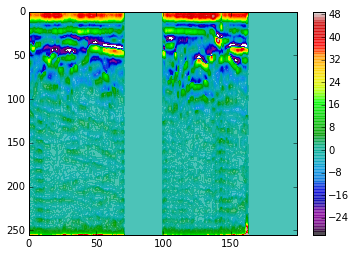

In [24]:
lim=arange(-30,50,1)
ylim(255.0,0)
contourf(x,y,Gp,lim,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gp.png')